# Лабораторная работа 3
## Метод сеток решения одномерного нестационарного уравнения теплопроводности.
### Вариант 13

### Задача 2
Промоделировать стационарные процессы теплопроводности стержня в зависимости от входных данных задачи – переменного коэффициента теплопроводности *k(x)* и плотности источников тепла *f(x)*:

$$\begin{cases} 
   -\frac {d}{dx} (k(x) \cdot \frac {du}{dx}) = f, \\
   u(a) = U_A, u(b) = U_B.
\end{cases}$$  

Интегральное уравнение имеет вид:

$$
W(a) - W(b) - \int_a^b q(x)u(x)dx + \int_a^b f(x)dx = 0 \Rightarrow
$$
$$
\Rightarrow W(a) - W(b) + \int_a^b f(x)dx = 0.
$$

$$
W(x) = -k(x)u'(x)
$$

Введем:
$$
x_n = nh, \ n=0,1,2,...,N, \ Nh = l
$$
Потоковые узлы:
$$
x_{n\pm0.5} = x_n \pm 0.5h
$$
Уравнение баланса на $[x_{n-0.5}, x_{n+0.5}]$:

$$
W_{n-0.5} - W_{n+0.5} + \int_{x_{n-0.5}}^{x_{n+0.5}} f(x)dx = 0.
$$

Найдем $W_{n\pm0.5}$:

$$
W(x) = -k(x)u'(x) \Rightarrow u_{n-1} - u_n = \int_{x_{n-1}}^{x_n} \frac{W(x)}{k(x)}dx.
$$

Для $x_{n-0.5} \leq x \leq x_{n+0.5}$:
$$
W_{n-0.5} \approx -a_n\frac{y_n-y_{n-1}}{h},\: a_n = \frac {h}{\int_{x_{n-1}}^{x_n} \frac {dx}{k(x)}}.
$$
Аналогично
$$
W_{n+0.5} \approx -b_n\frac{y_{n+1}-y_{n}}{h},\: b_n = \frac {h}{\int_{x_{n+1}}^{x_n} \frac {dx}{k(x)}}.
$$

Введем:
$$
\varphi_n = \frac{1}{h} \int_{x_{n-0.5}}^{x_{n+0.5}} f(x)dx.
$$
Тогда:

$$
-\varphi_n = \frac{1}{h}(b_n\frac{u_{n+1}-u_{n}}{h} -a_n\frac{u_n-u_{n-1}}{h}) = \frac{a_n}{h^2}u_{n-1} - \frac{a_n + b_n}{h^2}u_n + \frac{b_n}{h^2}u_{n+1}, \ n = 1, 2, ..., N-1.
$$


In [3]:
import math
import numpy as np
import matplotlib.pyplot as pl

In [2]:
N = 150
a = 1
b = 2.2
h = (b - a) / N
x_list = np.linspace(a, b, N+1)
k1 = k2 = k3 = 0
k12 = k23 = 0

conditions = [['4a/а) k1<<k2', 0.01, 100, 1, a+(b-a)/2, b+h],
              ['4a/б) k1>>k2', 100, 0.01, 1, a+(b-a)/2, b+h],
              ['4б/a) k1<k2<k3', 1, 2, 4, a+(b-a)/3, a+2*(b-a)/3],
              ['4б/б) k1>k2>k3', 4, 2, 1, a+(b-a)/3, a+2*(b-a)/3],
              ['4б/в) k1=k, k2=2k, k3=k', 1, 2, 1, a+(b-a)/3, a+2*(b-a)/3],
              ['4б/г) k1=20k, k2=k, k3=20k', 20, 1, 20, a+(b-a)/3, a+2*(b-a)/3]]

heat_sources = [('5a', [(a+(b-a)/2, 4)]), 
                ('5b', [(a+(b-a)/4, 4), (b-(b-a)/4, 4)]), 
                ('5c', [(a+(b-a)/4, 4), (b-(b-a)/4, 16)])]

In [3]:
def an(n):
    x = x_list[n]
    if x <= k12:
        return k1
    if x-h < k12:
        return h / ((k12 - x+h)/k1 + (x - k12)/k2)
    if x <= k23:
        return k2
    if x-h < k23:
        return h / ((k23 - x+h)/k2 + (x - k23)/k3)
    return k3

def bn(n):
    x = x_list[n]
    if x+h <= k12:
        return k1
    if x < k12:
        return h / ((k12 - x)/k1 + (x+h - k12)/k2)
    if x+h <= k23:
        return k2
    if x < k23:
        return h / ((k23 - x)/k2 + (x+h - k23)/k3)
    return k3

def phi(x, heat_source):
    hs_point, c = heat_source
    diff = abs(x - hs_point)
    if diff < h/2:
        return c
    if diff == h/2:
        return c/2
    return 0

In [4]:
def task2(heat_sourses):
    m = np.zeros((N+1, N+1))
    v = np.zeros(N+1)
    m[0, 0] = m[-1,-1] = 1
    v[0] = v[-1] = 0
    for i in range(1, N):
        m[i, i-1] = an(i)
        m[i, i] = -an(i) - bn(i)
        m[i, i+1] = bn(i)
        v[i] = -h * sum(phi(x_list[i], hs) for hs in heat_sourses)
    return np.linalg.solve(m, v)

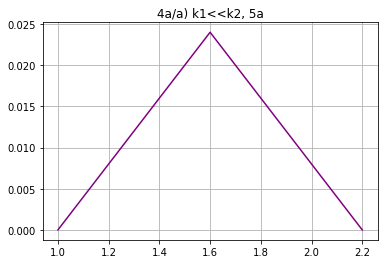

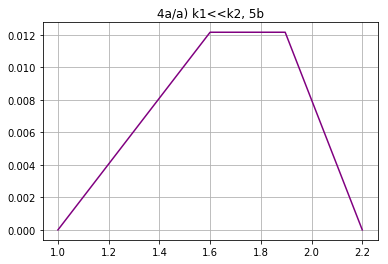

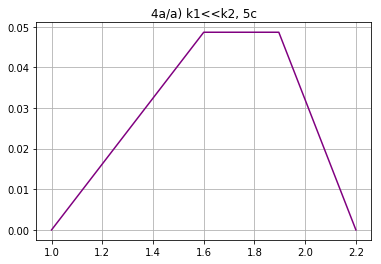

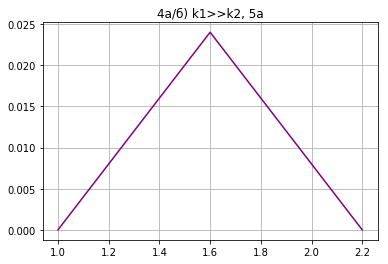

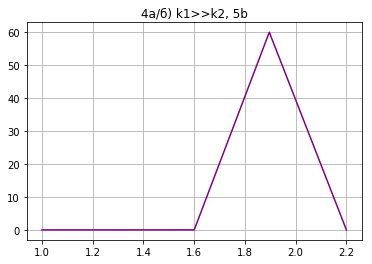

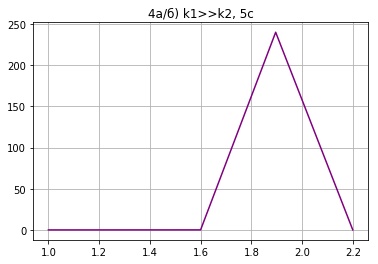

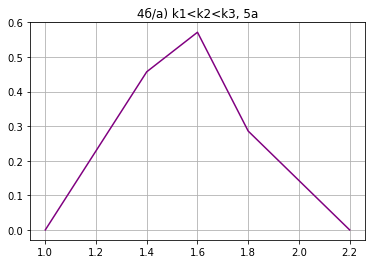

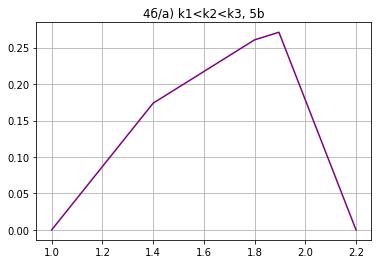

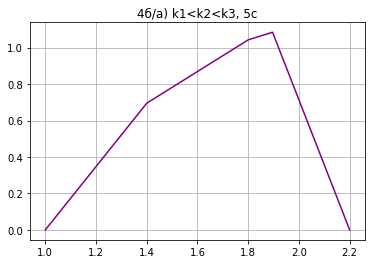

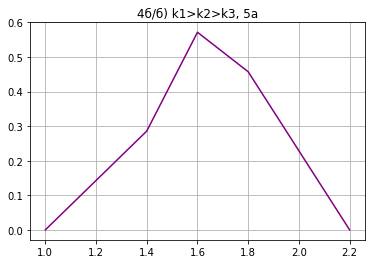

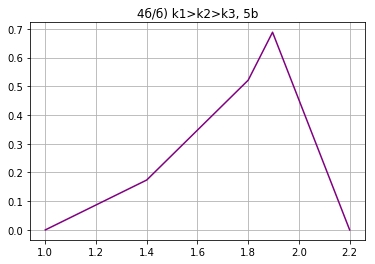

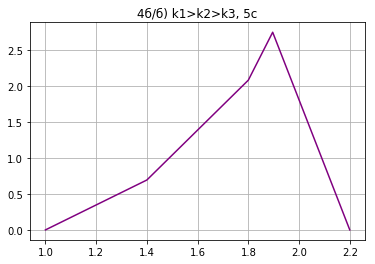

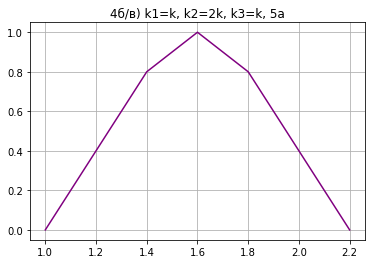

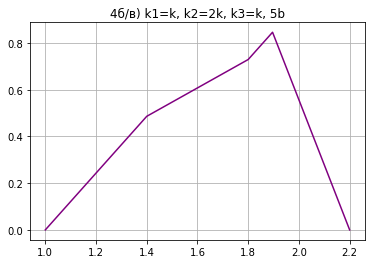

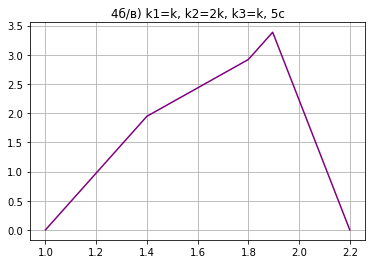

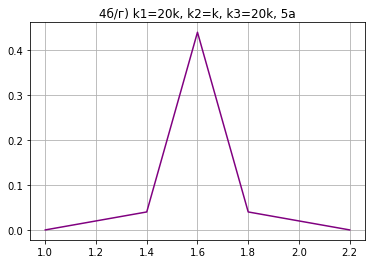

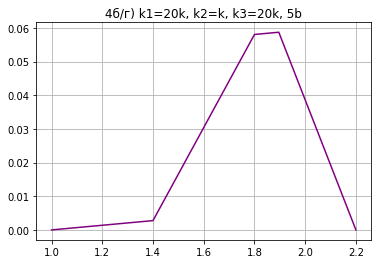

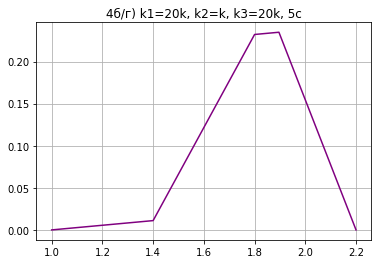

In [5]:
for k_par, k1, k2, k3, k12, k23 in conditions:
    for par, heat_source in heat_sources:
        pl.plot(x_list, task2(heat_source), color='purple')
        pl.title(k_par + ', ' + par)
        pl.grid()
        pl.show()

### Задача 3

Промоделировать нестационарные процессы теплопроводности в зависимости от входных данных задачи − коэффициента теплопроводности и начальной температуры:

$$\begin{cases} 
   \frac {du}{dt}= \frac {d}{dx} (k(x) \cdot \frac {du}{dx}) + f(x) \cdot (1 - e^{-t}), \;\; 0 < x < l, \ 0 < t < T, \\
   u(0, t) = U_A, \ u(l, t) = U_B, \qquad \qquad \;\;\: 0 \leq t \leq T,\\
   u(x, 0) = \varphi(x), \qquad \qquad \qquad \qquad \;\;\; 0 \leq x \leq l.
\end{cases}$$ 

Из уравнения теплопроводности:

$$\begin{cases} 
Lu \equiv \frac{\partial u}{\partial t} - \frac{\partial^2 u}{\partial x^2}  = f(x, t) \\
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau}\\
\frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2}
\end{cases} \Rightarrow
$$ 

$$
\Rightarrow Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2} \Rightarrow 
$$
$$
\Rightarrow u(x, t + \tau) = u(x, t) + \tau(\frac{u(x + h, t)}{h^2} - 2 \frac{u(x, t)}{h^2} + \frac{u(x-h, t)}{h^2}) = 
$$
$$
= \frac{\tau}{h^2}u(x-h,t) + (1 - \frac{\tau}{h^2})u(x,t) + \frac{\tau}{h^2}u(x+h, t)
$$

Аппроксимируем:

$$
\frac{\partial}{\partial x}(k(x)\frac{\partial u}{\partial x}) = \frac{k(x+\frac{h}{2})u'(x+\frac{h}{2}) - k(x-\frac{h}{2})u'(x-\frac{h}{2})}{\frac{h}{2}}
$$

Выражаем $u(x,t+\tau)$:
$$
u(x,t+\tau)= \frac{k(x-\frac{h}{2})\tau}{h^2}u(x-h, t) + 
(1 - \frac{(k(x-\frac{h}{2})-k(x+\frac{h}{2}))\tau}{h^2}u(x, t) + \frac{k(x+\frac{h}{2})\tau}{h^2}u(x+h, t)
$$

In [19]:
a = 1
b = 2.2
Ua = -2
Ub = 2
tau = 0.05
tN = 33
h = 0.1
t = tN*tau
x_list = np.arange(a, b, h)

def k(x):
    return x**-2

def f(x):
    return 6*x*x - 3*x

phi_a = 50
phi_b = (4-3.84*phi_a)/1.2
phi_c = -2-phi_a-phi_b
def phi(x):
    return phi_a*(x)**2+phi_b*(x)+ phi_c

In [20]:
def task3():
    m = np.zeros((tN, x_list.size))
    m[:,0] = np.full((tN), Ua)
    m[:,-1] = np.full((tN), Ub)
    m[0] = phi(x_list)
    for i in range(1, tN):
        for j in range(1, x_list.size-1):
            m[i][j] = k(x_list[j]-h/2)*tau/(h ** 2) * m[i-1][j-1]\
            + (1-(k(x_list[j]-h/2)+k(x_list[j]+h/2))*tau/(h ** 2)) * m[i-1][j]\
            + k(x_list[j]+h/2)*tau/(h ** 2) * m[i-1][j+1]\
            + tau * f(x_list[j])*(1-math.exp(-i*tau))
    return m

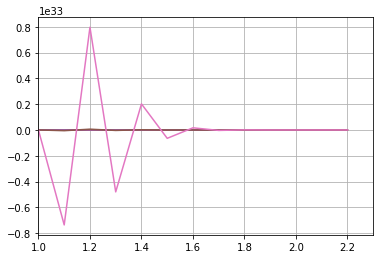

In [21]:
for i in task3()[::2]:
    pl.plot(x_list,i)
pl.xlim(1, 2.3)
pl.grid()
pl.show()

### Задача 4
Промоделировать нестационарные процессы теплопроводности в зависимости от входных данных задачи:
$$\begin{cases} 
   \frac {du}{dt}= k(x) \cdot \frac {d^2u}{dx^2} + f(x, t), \qquad a \leq x \leq b,\; 0 < t \leq T,\\
   u(a, t) = g_1(t), \ u(b, t) = g_2(t), \;\;\; 0 < t \leq T,\\
   u(x, 0) = \varphi(x), \qquad \qquad \qquad a \leq x \leq b.
\end{cases}$$  
Выразим $u(x, t+\tau)$:
$$
u(x, t + \tau) = \frac{c \cdot \tau}{h^2}u(x-h,t) + (1 - \frac{c \cdot \tau}{h^2})u(x,t) + \frac{c \cdot \tau}{h^2}u(x+h, t),\ c - const
$$ 

In [69]:
a = 0
b = 1
k = 0.2
xN = 10
h = (b-a)/xN
x_list = np.arange(a, b+h, h)

k = 0.2
t = 0.25

tau = 0.05*((h**2)/k)
t_list = np.arange(0, t + tau, tau)
dot_multiplier = [k*tau / h**2, 1 - 2*k*tau / h**2, k*tau / h**2]

def phi(x):
    return np.sin(x)

def g1(t):
    return 0

def g2(t):
    return np.sin(2*t+1)

def f(x, t):
    return 1-x

In [70]:
def task4():
    m = np.zeros((t_list.size, x_list.size))
    m[:,0] = g1(t_list)
    m[:,-1] = g2(t_list)
    m[0] = phi(x_list)
    for i in range(1, t_list.size):
        for j in range(1, x_list.size-1):
            m[i][j] = m[i-1, j-1:j+2].dot(dot_multiplier) + tau * f(x_list[j], t_list[i])
    return m

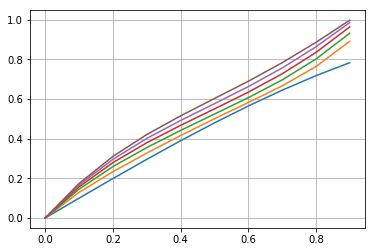

In [71]:
for line in task4()[::20]:   
    pl.plot(x_list, line)
pl.grid()
pl.show()